# Exploratory Data Analysis
- Preliminary step in data analysis to;
    - Summarize main characteristics of the data
    - Gain better understanding of the data set
    - Uncover relationship between variables
    - Extract important variables

# Reading & Writing Data in Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "Auto85.csv"
df = pd.read_csv(path, header = None) #read_csv() assumes data has a header

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels","engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "Price"]

In [4]:
df.columns = headers

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Exploratory Data Analysis

In [6]:
# Descriptive statistics
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Summarize the categorical data by using _value_counts( )_

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
Price                 object
dtype: object

In [7]:
drive_wheels_counts = df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [8]:
drive_wheels_counts.rename({'drive-wheels':'value_counts'}, inplace = True)
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

## Box plot

In [8]:
# replace all the missing values in price column with nan
df["Price"].replace("?", np.nan, inplace = True)
df["Price"] = pd.to_numeric(df["Price"])

<AxesSubplot:xlabel='drive-wheels', ylabel='Price'>

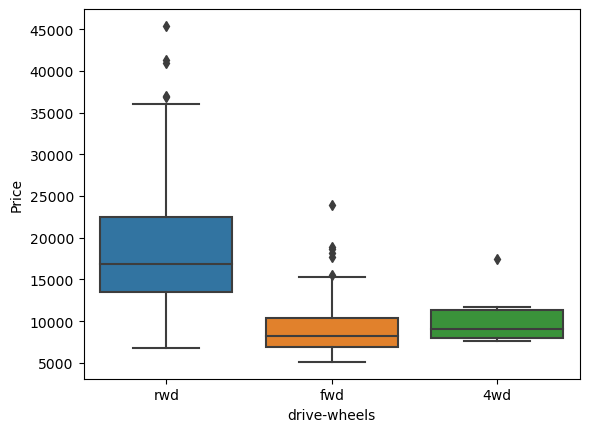

In [9]:
import seaborn as sns
sns.boxplot(x="drive-wheels", y = "Price", data = df)

## Scatter Plot

Text(0, 0.5, 'Price1')

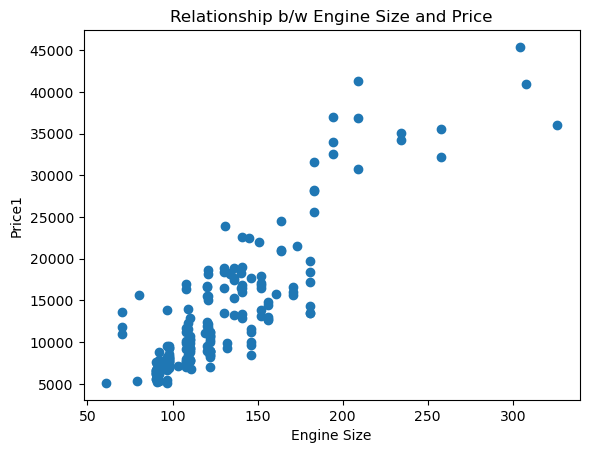

In [11]:
# The price is increasing as the engine size increases
import matplotlib.pyplot as plt
plt.scatter(df["engine-size"], df["Price"])
plt.title("Relationship b/w Engine Size and Price")
plt.xlabel("Engine Size")
plt.ylabel("Price1")

# Group by Python

In [12]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
# extracting 3 columns from the above dataframe for further analysis
df_test = df[ ["drive-wheels","body-style", "Price"] ]

In [14]:
df_test

,drive-wheels,body-style,Price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [16]:
# calculating average price of different cars based on drive-wheels and body-style
df_grp = df_test.groupby( [ "drive-wheels","body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,Price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [17]:
# converting above table to pivot table for better understanding
df_pivot = df_grp.pivot(index = "drive-wheels", columns = "body-style")
df_pivot

Price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

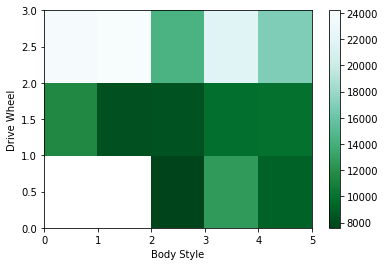

In [18]:
# Now lets convert the above table to graph
import matplotlib.pyplot as plt
plt.pcolor(df_pivot, cmap = "BuGn_r")
plt.colorbar()
plt.xlabel("Body Style")
plt.ylabel("Drive Wheel")
plt.show()

# Correlation

Text(0.5, 1.0, 'Correlation b/w Engine Size and Price')

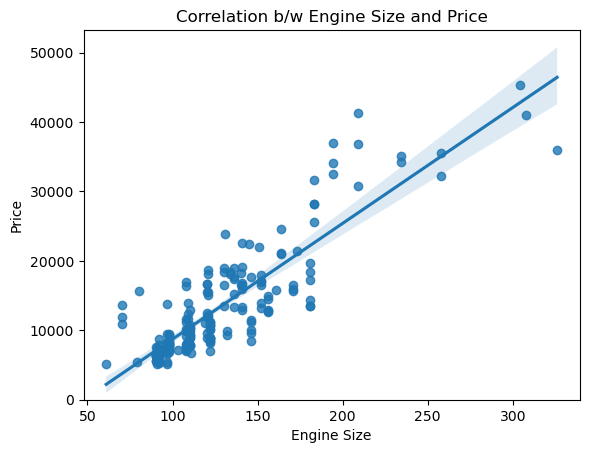

In [15]:
# Check whether there is a correlation between engine size and price or not
# Postive correlation: If the engine size increases, the price also increases.
# Negative correlation: If the engine size increases, the prices decreases.
import seaborn as sns
sns.regplot(x="engine-size", y = "Price", data=df)
plt.ylim(0,) # on y axis the first point should be zero
plt.xlabel("Engine Size")
plt.title("Correlation b/w Engine Size and Price")

Text(0.5, 1.0, 'Negative Correlation b/w highway-mpg and Price')

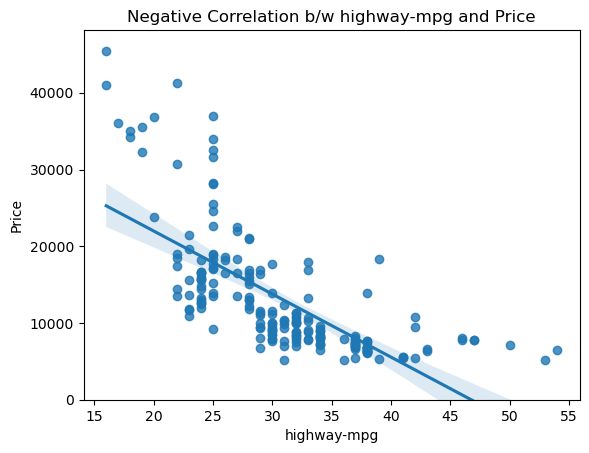

In [16]:
# finding out correlation between highway-mpg and price
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="highway-mpg", y="Price", data=df)
plt.ylim(0,)
plt.xlabel("highway-mpg")
plt.title("Negative Correlation b/w highway-mpg and Price")

In [18]:
""" Find the no of missing values in peak-rpm column"""
df["highway-mpg"].isnull().sum() # checking is there any missing value or not

0

In [19]:
""" Convert the data type of peak-rpm from object to float """
df["peak-rpm"].replace("?", np.nan, inplace = True)
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"])

Text(0.5, 1.0, 'Weak Correlation b/w Peak RPM and Price')

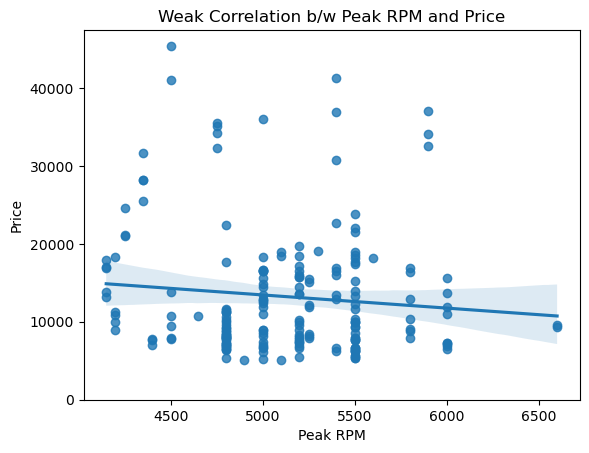

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="peak-rpm", y="Price", data=df)
plt.ylim(0,)
plt.xlabel("Peak RPM")
plt.title("Weak Correlation b/w Peak RPM and Price")

# Correlation Statistics

In [ ]:
# find is there a positive correlation, or negative correlation or no correlation at all.
""" Convert the data type of horsepower from object to float """
df["horsepower"].replace("?", 0, inplace = True) # replace ? with 0
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["horsepower"].fillna(0, inplace = True) # replace missing values with 0
df["Price"].fillna(0, inplace = True)

In [ ]:
from scipy.stats import pearsonr
pearson_coef, p_val = pearsonr(df["horsepower"], df["Price"])

In [ ]:
# it closer to 1, so there is a positive correlation
pearson_coef

In [ ]:
# it is a very small value and it is less than 0.001 which means there is a strong positive correlation
p_val